In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [2]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
14999,0.71,0.66,5,187,2,0,0,0,sales,medium,NaN
15000,0.75,0.84,3,145,3,1,0,0,support,low,NaN
15001,0.32,0.41,3,138,3,1,0,0,technical,medium,29.0
15002,0.62,0.58,3,148,2,1,0,0,technical,low,NaN
15003,0.81,0.94,3,225,4,0,0,0,hr,medium,NaN


In [3]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                      object
promotion_last_5years      int64
Department                object
salary                    object
age                      float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [5]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

There are 29 values missing in salary column and 11924 values missing in age column

In [6]:
df.isna().sum()/len(df)*100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.000000
Work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
Department                0.000000
salary                    0.193282
age                      79.472141
dtype: float64

* 0.193282% missing data in the salary column 
* 79.472141% data missing in the age column

<AxesSubplot:>

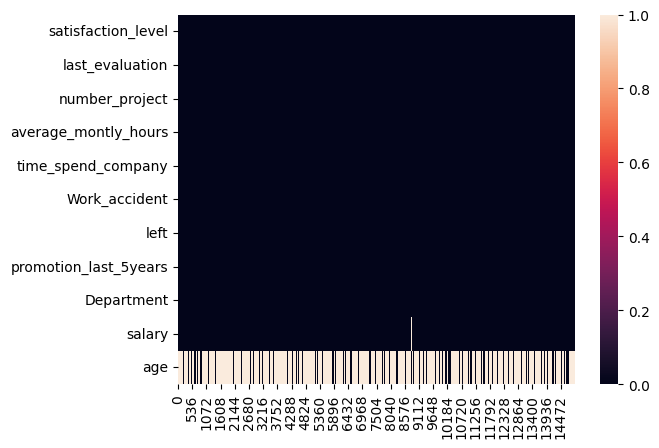

In [7]:
sns.heatmap(df.isna().transpose())

So we drop the age column 

And drop the missing rows in salary column

In [8]:
df.drop(columns = ['age'],inplace=True)

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.24,0.79,2,175,5,0,0,0,IT,low
1,0.40,0.49,2,155,3,0,1,0,hr,medium
2,0.45,0.45,2,154,3,1,1,0,support,medium
3,0.46,0.73,6,256,4,0,0,0,product_mng,high
4,0.14,0.54,5,275,4,1,0,0,sales,high


In [10]:
# drop rows with missing data
df.dropna(inplace = True)

In [11]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14975.000000,14975.00000,14975.000000,14975.000000,14975.000000,14975.000000,14975.000000
mean,0.612971,0.71618,3.803272,201.007746,3.498097,0.144641,0.021302
std,0.248513,0.17115,1.232665,49.920424,1.460712,0.351750,0.144395
min,0.090000,0.36000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.56000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.72000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.87000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.00000,7.000000,310.000000,10.000000,1.000000,1.000000


# Encoding categorical data into numerical form

In [13]:
print(df['Department'].unique())

['IT' 'hr' 'support' 'product_mng' 'sales' 'technical' 'marketing'
 'management' 'accounting' 'RandD']


In [14]:
print(df['salary'].unique())

['low' 'medium' 'high']


## Using label encoder for both

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['salary'])

LabelEncoder()

In [16]:
df['salary']= encoder.transform(df['salary'])

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.24,0.79,2,175,5,0,0,0,IT,1
1,0.40,0.49,2,155,3,0,1,0,hr,2
2,0.45,0.45,2,154,3,1,1,0,support,2
3,0.46,0.73,6,256,4,0,0,0,product_mng,0
4,0.14,0.54,5,275,4,1,0,0,sales,0


<AxesSubplot:xlabel='Department', ylabel='count'>

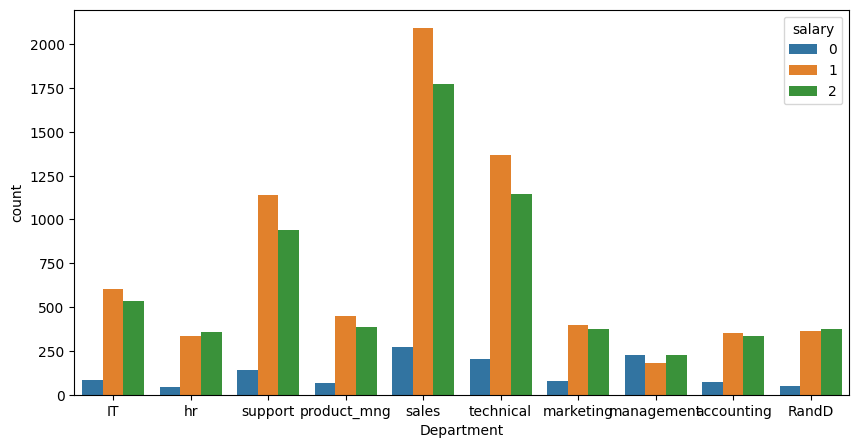

In [18]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Department',hue='salary')

This is the relation between salary and department

In [19]:
encoder.fit(df['Department'])

LabelEncoder()

In [20]:
df['Department']= encoder.transform(df['Department'])

In [21]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.24,0.79,2,175,5,0,0,0,0,1
1,0.40,0.49,2,155,3,0,1,0,3,2
2,0.45,0.45,2,154,3,1,1,0,8,2
3,0.46,0.73,6,256,4,0,0,0,6,0
4,0.14,0.54,5,275,4,1,0,0,7,0


In [22]:
df['left'].unique()

array(['0', '1', '?'], dtype=object)

here ? string value in column, we need to replace it with a numerical value i.e in this case 2

In [23]:
df['left'].replace('?',2,inplace=True)
df['left']=df['left'].astype(int)

In [24]:
df['left'].unique()

array([0, 1, 2])

# Using ml models

In [25]:
X=df.drop('left',axis = 1) 
y=df.left

In [26]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.24,0.79,2,175,5,0,0,0,1
1,0.40,0.49,2,155,3,0,0,3,2
2,0.45,0.45,2,154,3,1,0,8,2
3,0.46,0.73,6,256,4,0,0,6,0
4,0.14,0.54,5,275,4,1,0,7,0


In [27]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: left, dtype: int32

# logistic regression

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             confusion_matrix,
                             precision_score,
                             ConfusionMatrixDisplay,
                             recall_score,
                             classification_report)
model= LogisticRegression()

In [36]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [39]:
accuracy=accuracy_score(y_true=y_test, y_pred= y_pred)
precision=precision_score(y_true=y_test, y_pred= y_pred)
recall=recall_score(y_true=y_test, y_pred= y_pred)
f1=f1_score(y_true=y_test, y_pred= y_pred)
confusion_matrix=confusion_matrix(y_true=y_test, y_pred= y_pred)
report=classification_report(y_true=y_test, y_pred= y_pred)
print(f'accuracy={accuracy}')
print(f'precision={precision}')
print(f'recall={recall}')
print(f'f1 score={f1}')

accuracy=0.779966611018364
precision=0.5013774104683195
recall=0.27575757575757576
f1 score=0.3558162267839687


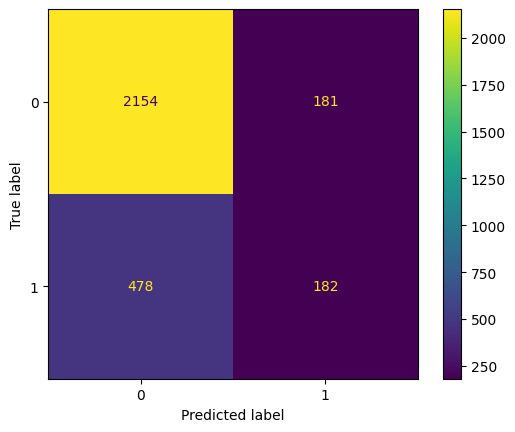

In [40]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

# SVM

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             confusion_matrix,
                             precision_score,
                             ConfusionMatrixDisplay,
                             recall_score,
                             classification_report)
y_pred = model.predict(X_test)
accuracy=accuracy_score(y_true=y_test, y_pred= y_pred)
precision=precision_score(y_true=y_test, y_pred= y_pred)
recall=recall_score(y_true=y_test, y_pred= y_pred)
f1=f1_score(y_true=y_test, y_pred= y_pred)
confusion_matrix=confusion_matrix(y_true=y_test, y_pred= y_pred)
report=classification_report(y_true=y_test, y_pred= y_pred)
print(f'accuracy={accuracy}')
print(f'precision={precision}')
print(f'recall={recall}')
print(f'f1 score={f1}')

accuracy=0.803338898163606
precision=1.0
recall=0.10757575757575757
f1 score=0.19425444596443228


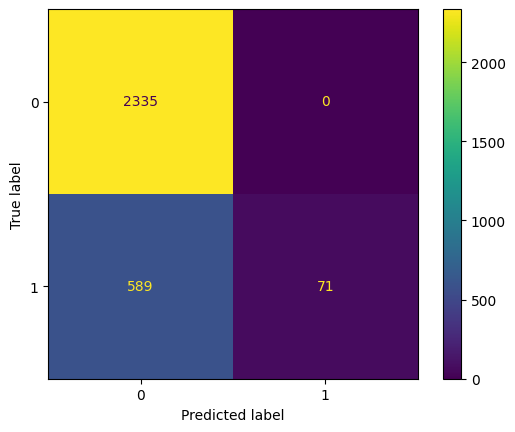

In [42]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

the f1 score is lower than that of logistic regression.but the false positive is zero while true negative is lower than false negative. Whereas the accuracy and precision has increased.